## [Q1 8 points] Read the data

First we import packages and then read data with read_csv method. 

In [75]:
#Imports

import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics

In [2]:
names = ['County_State','Percent_voting','Median_Age','Mean_Savings','PerCapita_Income', 'Percent_Poverty','Percent_Veterans','Percent_Female','Population_Density', 'Percent_Nursing_Homes','Crime_Index']
df = pd.read_csv("http://www.stat.ufl.edu/~winner/data/clinton1.dat", names = names,sep='\s\s+',engine='python')
df[:20]

,County_State,Percent_voting,Median_Age,Mean_Savings,PerCapita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_Nursing_Homes,Crime_Index
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
5,"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
6,"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
7,"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
8,"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51
9,"Chilton, AL",34.19,34.0,52230,14036,18.6,9.48,51.41,47.8,3.58,296


## [Q2 8 points] Predict percentVoting on all regressors.

We store string of regressors in variable called regressors_string and then use it when creating dmatrices. 
Out of all regressors Median_Age and Crime_Index have the worst P value when predicting Percent_voting
therefore we are not sure if we can trust these variables.
Overall R-squared is 0.327 and we therefore say that there is a lot of noise in our data. 

In [3]:
regressors = names[2:]
regressors_string = ' + '.join(regressors)
y, X = dmatrices('Percent_voting ~ '+regressors_string, data = df, return_type = 'dataframe')
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Percent_voting   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     145.4
Date:                Fri, 14 Apr 2017   Prob (F-statistic):          4.12e-224
Time:                        20:24:52   Log-Likelihood:                -9576.0
No. Observations:                2704   AIC:                         1.917e+04
Df Residuals:                    2694   BIC:                         1.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept               -38.3094      5.818     -6.585      0.000       -49.717   -26.901
Median_Age                0.0707      0.060      1.179      0.239        -0.047     0.188
Mean_Savings          -3.077e-05   4.93e-06     -6.247      0.000     -4.04e-05 -2.11e-05
PerCapita_Income          0.0002   7.42e-05      2.375      0.018      3.08e-05     0.000
Percent_Poverty           0.7669      0.035     22.118      0.000         0.699     0.835
Percent_Veterans          0.3088      0.087      3.554      0.000         0.138     0.479
Percent_Female            1.1844      0.119      9.985      0.000         0.952     1.417
Population_Density        0.0019      0.000      9.681      0.000         0.002     0.002
Percent_Nursing_Homes    -0.0908      0.033     -2.794      0.005        -0.155    -0.027
Crime_Index              -0.0013      0.001     -1.469      0.142        -0.003     0.000
==============================================================================
Omnibus:                       22.560   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.526
Skew:                           0.129   Prob(JB):                     6.39e-07
Kurtosis:                       3.432   Cond. No.                     3.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## [Q3 8 points] A formula-creating function.

We created function called formula with one parameter - regressors_list, which returns string that we can use when creating dmatrices for our regression model later on. 

In [4]:
def formula(regressors_list):
    if isinstance(regressors_list, basestring):
        reg_string = 'Percent_voting ~ ' + regressors_list
    else:
        reg_string = ' + '.join(regressors_list)
        reg_string = 'Percent_voting ~ ' + reg_string
    return reg_string   

formula(names[5])

'Percent_voting ~ Percent_Poverty'

## [Q4 8 points] R-squared computation function

Here we created function called rsquared with one parameter - regressors, which is a list of all regressors that we would like to use for our model. Next we convert this to string with our formula function and create model. After we fit our model we can return value of R-squared. 

In [5]:
def rsquared(regressors):
    formula_string = formula(regressors)
    y, X = dmatrices(formula_string, data = df, return_type = 'dataframe')
    model = sm.OLS(y,X)
    result = model.fit()
    return result.rsquared

rsquared(names[5])

0.25103851961631962

## [Q5 8 points] Find the next best regressor.

Function called best_next_regressor goes though every single regressor that is available and appends it to our second list called current_regressor_list when it is not there yet. We also check if the list current_regressor_list is actual list and not a single value of string - only then we can use append method. We then calculated rsquared with previous function and remove added agressor and continue on with next one until we find the one with the highest overall rsquared. 

In [6]:
def best_next_regressor(current_regressor_list, all_regressors_list):
    highest_rsquared = 0
    current_rsquared = -1
    best_regressor = ''
    for regressor in all_regressors_list:
        if regressor not in current_regressor_list:
            if isinstance(current_regressor_list, basestring):
                current_regressor_list = [current_regressor_list]
                pass
            else:
                current_regressor_list.append(regressor)
                current_rsquared = rsquared(current_regressor_list)
                current_regressor_list.pop()
                if current_rsquared > highest_rsquared:
                    best_regressor = regressor
                    highest_rsquared = current_rsquared
    return best_regressor, highest_rsquared


best_next_regressor(names[9],names[2:])

('Percent_Poverty', 0.25541066531502676)

## [Q6 8 points] Pick the k best regressors. 

Function best_regressors takes two parameters - number of regressors we would like to use and list of all available regressors. First we check for input error and then with help of best_next_regressor function we choose best K regressors. We also have to keep current_regressor_list updated after we choose regressor in order for best_next_regressor to work properly. We return K best regressors with R-squared as dataframe. 

In [7]:
def best_regressors(num_regressors,all_regressors_list):
    final_list = []
    if num_regressors >  len(names[2:]):
        print 'Not enough variables'
    else:
        current_regressor_list = []
        current_r = []
        for iteration in range(num_regressors):
            best_next_reg = best_next_regressor(current_regressor_list,names[2:])[0]
            best_next_r  = best_next_regressor(current_regressor_list,names[2:])[1]
            current_regressor_list.append(best_next_reg)
            current_r.append(best_next_r)
            final_list.append([current_regressor_list[iteration],current_r[iteration]])
            df_regressors = pd.DataFrame(final_list,columns = ['Regressor','R'])
        return df_regressors

best_regressors(3,names[2:])

,Regressor,R
0,Percent_Poverty,0.251039
1,Population_Density,0.285830
2,Percent_Female,0.309145


## [Q7 8 points] Order all regressors in the best order.

Here we only call best_regressors function with maximum possible regressors. Function returns variables in right order with R-squared increasing in each step by maximum.

In [8]:
best_regressors(len(names[2:]),names[2:])

,Regressor,R
0,Percent_Poverty,0.251039
1,Population_Density,0.285830
2,Percent_Female,0.309145
3,Mean_Savings,0.319241
4,Percent_Veterans,0.322993
5,Percent_Nursing_Homes,0.324851
6,PerCapita_Income,0.325825
7,Crime_Index,0.326553
8,Median_Age,0.326900


## [Q8 8 points] Plot the R-squared values as regressors are added in the best order

Here we visualize regressors in the same order from previous question. We used plt.bar to visualize regressors indexes  on x axes and their R values on y axes. Next we changed labels on x axes to actual names.

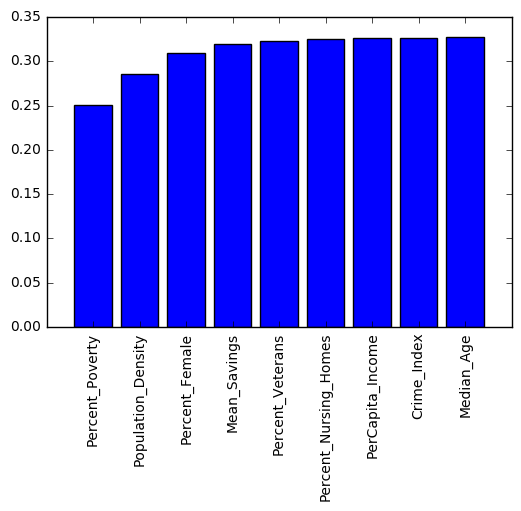

In [9]:
dfreg = best_regressors(len(names[2:]),names[2:])
plt.bar(dfreg['Regressor'].index,dfreg['R'],align = 'center')
plt.xticks(dfreg['Regressor'].index, dfreg['Regressor'], rotation='vertical')
plt.show()

## [Q9 8 points] Create a classification target.

To create new target column new function was created called CreateTarget, which takes every percent voting in each 
county and set positive value to class variable if this value is at least 40. 

In [25]:
df_class = df.copy()

def CreateTarget(val):
    if float(val) >= 40.0:
        return 1
    else:
        return 0 
      
df_class['Target'] = df_class['Percent_voting'].map(CreateTarget)
df_class.ix[:5]


,County_State,Percent_voting,Median_Age,Mean_Savings,PerCapita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_Nursing_Homes,Crime_Index,Target
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,0
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,0
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,0
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1
5,"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266,1


## [Q10 8 points] Create training and test sets.

Matrices with two features and one class variable were created and returned as dataframe. Next we split our dataframe into trainig and testing parts.

In [ ]:
Y,X = dmatrices('Target ~ 0 + Percent_Poverty + Population_Density', data = df_class, return_type = 'dataframe')
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.3)

## [Q11 12 points] Accuracy of classification.

function kNN was created which takes either training or testing features and target variable. Then it goes through 
knn_list where numbers of neighbors are specified. First we need to check if we have more data than number of neighbors
and then we can create model with set parameters. Accuracies of models with different parameters are returned. 

In [97]:
knn_list = [1,3,5,10,20,50,100,1000]

def kNN(X, Y):
    for knn in knn_list:
        if len(X) < knn:
            print 'Too many neighbors for this dataset'
        else:
            model = neighbors.KNeighborsClassifier(n_neighbors=knn,weights ='uniform',p=2)
            model.fit(X,Y['Target'].values)
            print 'Accuracy ' + 'with ' + str(knn) + ' kNN: ' + str(metrics.accuracy_score(y_true=Y, y_pred=model.predict(X)))

print 'Train:'
kNN(X_train, Y_train)

print 'Test:'
kNN(X_test, Y_test)

Train:
Accuracy with 1 kNN: 0.996828752643
Accuracy with 3 kNN: 0.793868921776
Accuracy with 5 kNN: 0.758985200846
Accuracy with 10 kNN: 0.706131078224
Accuracy with 20 kNN: 0.702959830867
Accuracy with 50 kNN: 0.677589852008
Accuracy with 100 kNN: 0.668604651163
Accuracy with 1000 kNN: 0.566596194503
Test:
Accuracy with 1 kNN: 0.998768472906
Accuracy with 3 kNN: 0.817733990148
Accuracy with 5 kNN: 0.746305418719
Accuracy with 10 kNN: 0.729064039409
Accuracy with 20 kNN: 0.679802955665
Accuracy with 50 kNN: 0.682266009852
Accuracy with 100 kNN: 0.667487684729
Too many neighbors for this dataset


## [Q12 8 points] Plots and reasons

When looking at two dimensions - Percent_Poverty and Population_Density Bill Clinton was successful in 1992 election 
mostly in counties with higher population density and higher rate of poverty. Vice-versa he was not that successfull in
counties with lower rate of poverty and lower population density. 

This pattern can be also seen in this analysis by NYTimes:
http://www.nytimes.com/interactive/2010/11/07/weekinreview/20101107-detailed-exitpolls.html?_r=0


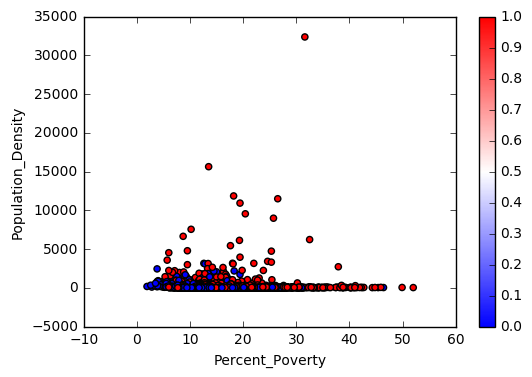

In [104]:
plt.scatter(df_class['Percent_Poverty'],df_class['Population_Density'],c = df_class['Target'],cmap='bwr')
plt.xlabel('Percent_Poverty')
plt.ylabel('Population_Density')
plt.colorbar()
plt.show()